In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv('../data/raw/customer_churn_raw.csv')


print("Dataset loaded successfully. Shape:", df.shape)
df.info()

Dataset loaded successfully. Shape: (1150, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1150 non-null   int64  
 1   Age                         1150 non-null   int64  
 2   Gender                      1060 non-null   object 
 3   Annual_Income               1059 non-null   object 
 4   Total_Spend                 1150 non-null   float64
 5   Years_as_Customer           1150 non-null   int64  
 6   Num_of_Purchases            1150 non-null   int64  
 7   Average_Transaction_Amount  1150 non-null   float64
 8   Num_of_Returns              1055 non-null   float64
 9   Num_of_Support_Contacts     1150 non-null   int64  
 10  Satisfaction_Score          1054 non-null   float64
 11  Last_Purchase_Days_Ago      1150 non-null   int64  
 12  Email_Opt_In                1150 non-null  

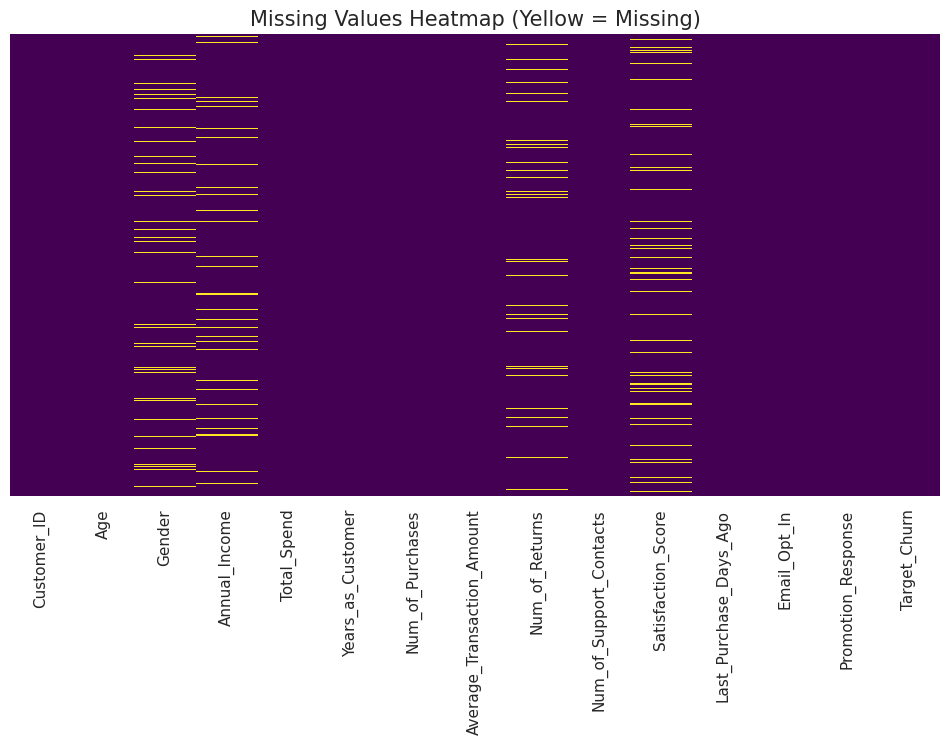

In [22]:
plt.figure(figsize=(12, 6))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Yellow = Missing)', fontsize=15)
plt.show()

/tmp/ipykernel_154631/666450038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Target_Churn', palette='viridis')


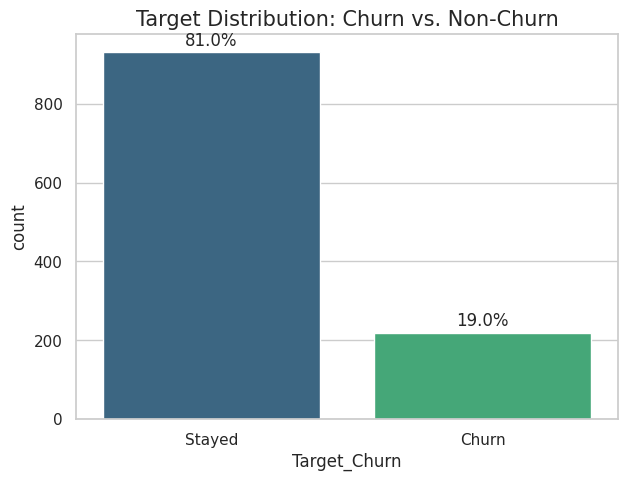

In [23]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='Target_Churn', palette='viridis')


total = len(df['Target_Churn'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, xytext=(0, 5),
                textcoords='offset points')

plt.title('Target Distribution: Churn vs. Non-Churn', fontsize=15)
plt.show()

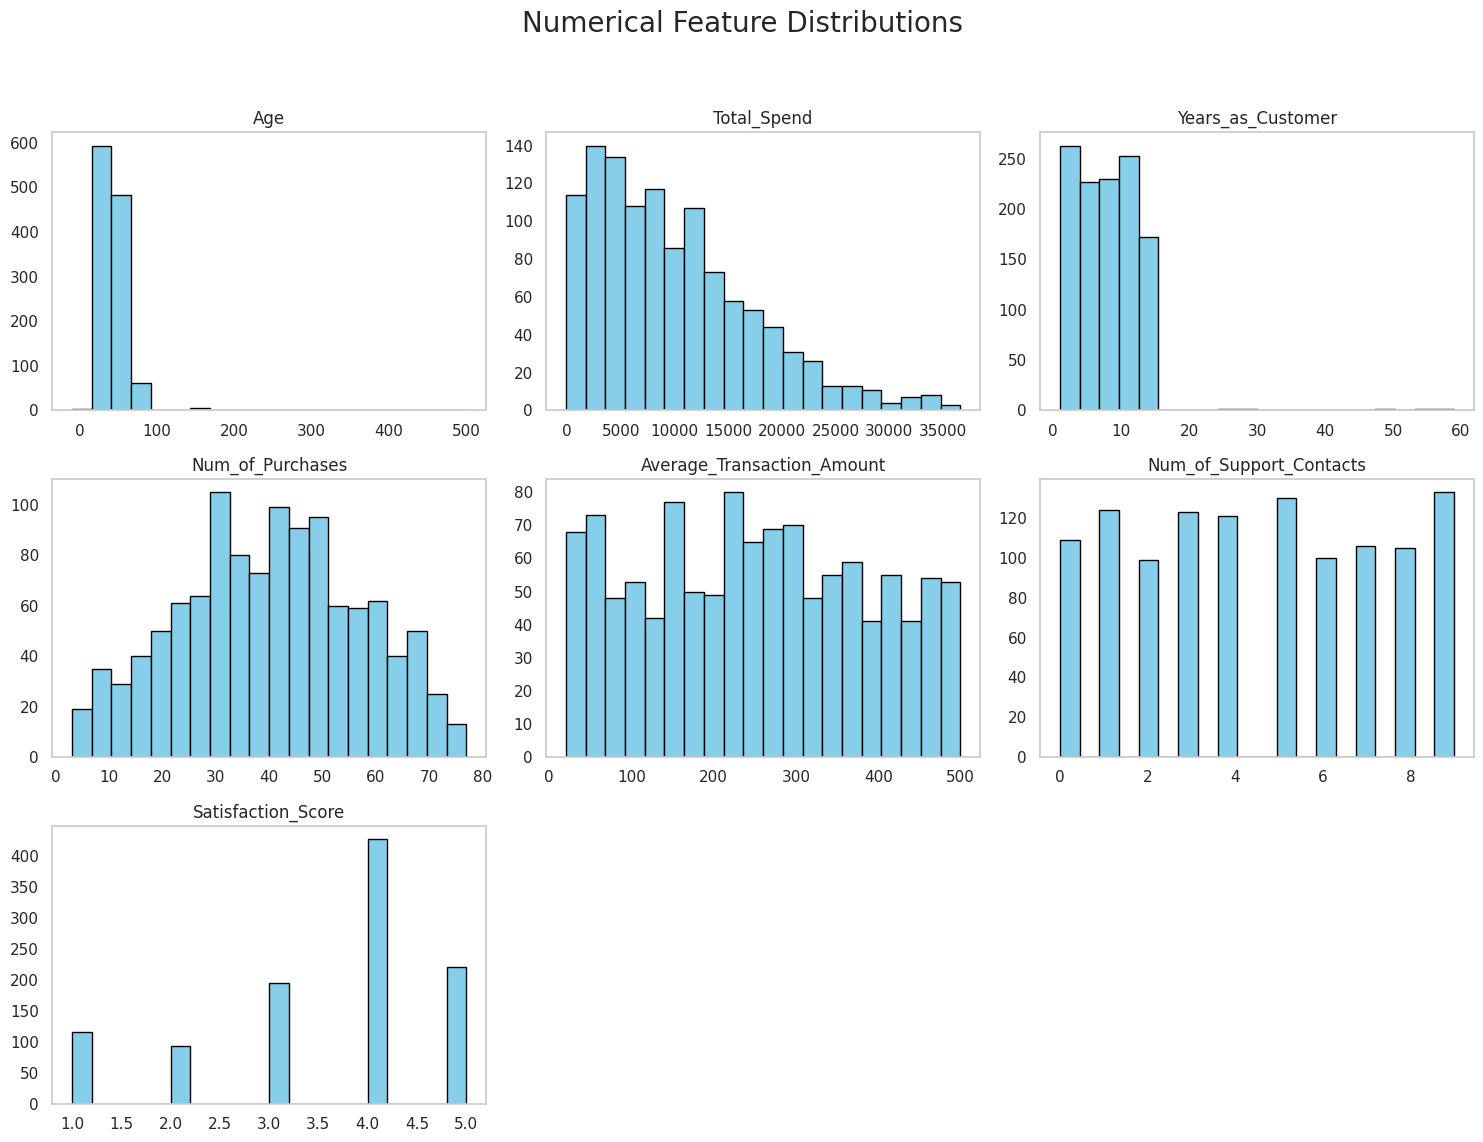

In [24]:

num_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 
            'Num_of_Purchases', 'Average_Transaction_Amount', 
            'Num_of_Support_Contacts', 'Satisfaction_Score']


df[num_cols].hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black', grid=False)
plt.suptitle('Numerical Feature Distributions', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

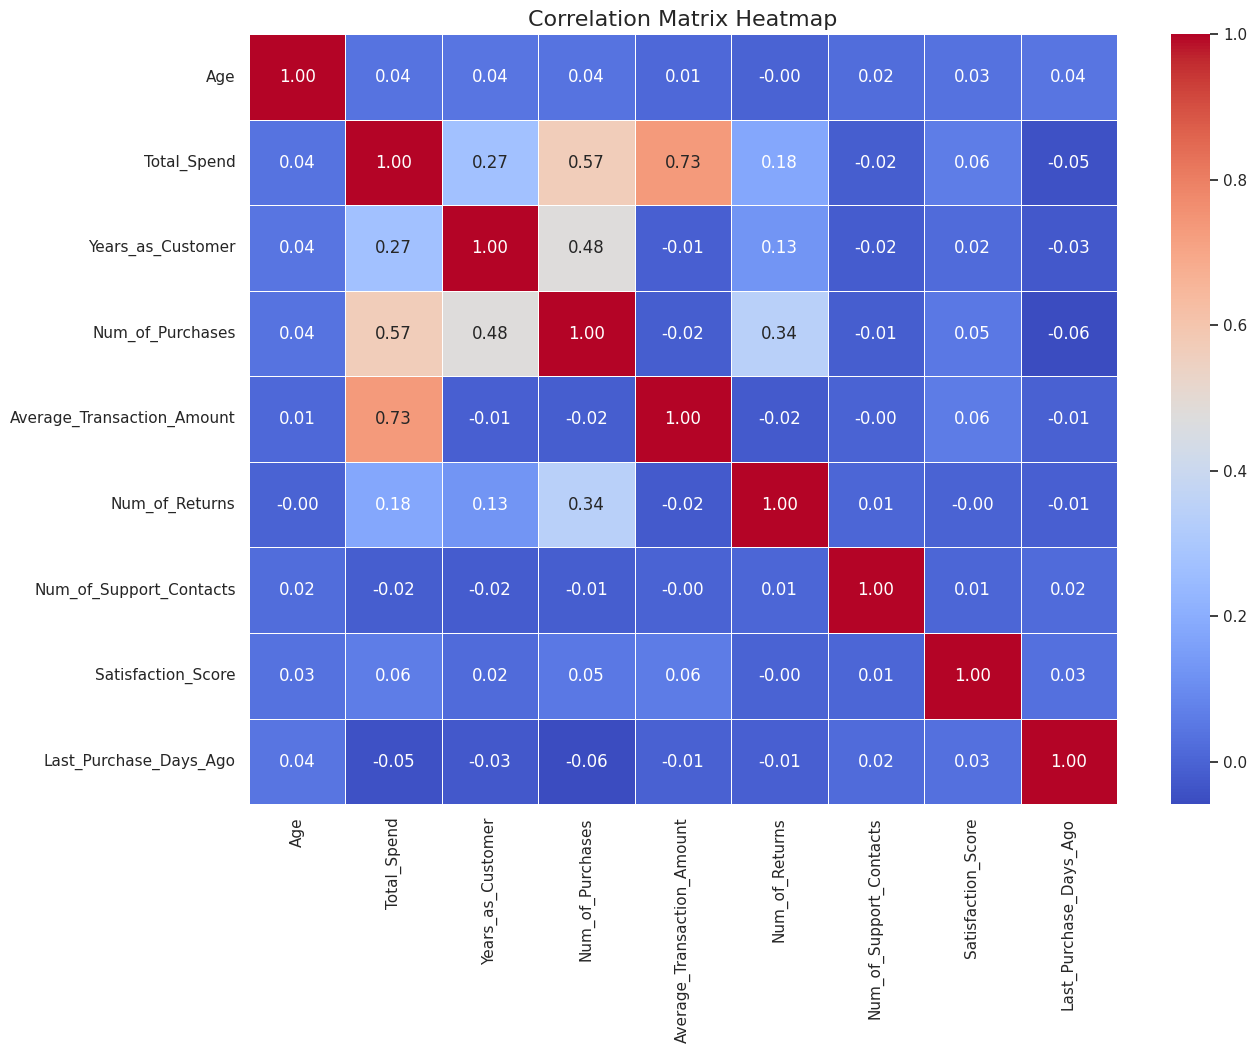

In [25]:
plt.figure(figsize=(14, 10))


numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['Customer_ID'], errors='ignore')


corr_matrix = numeric_df.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

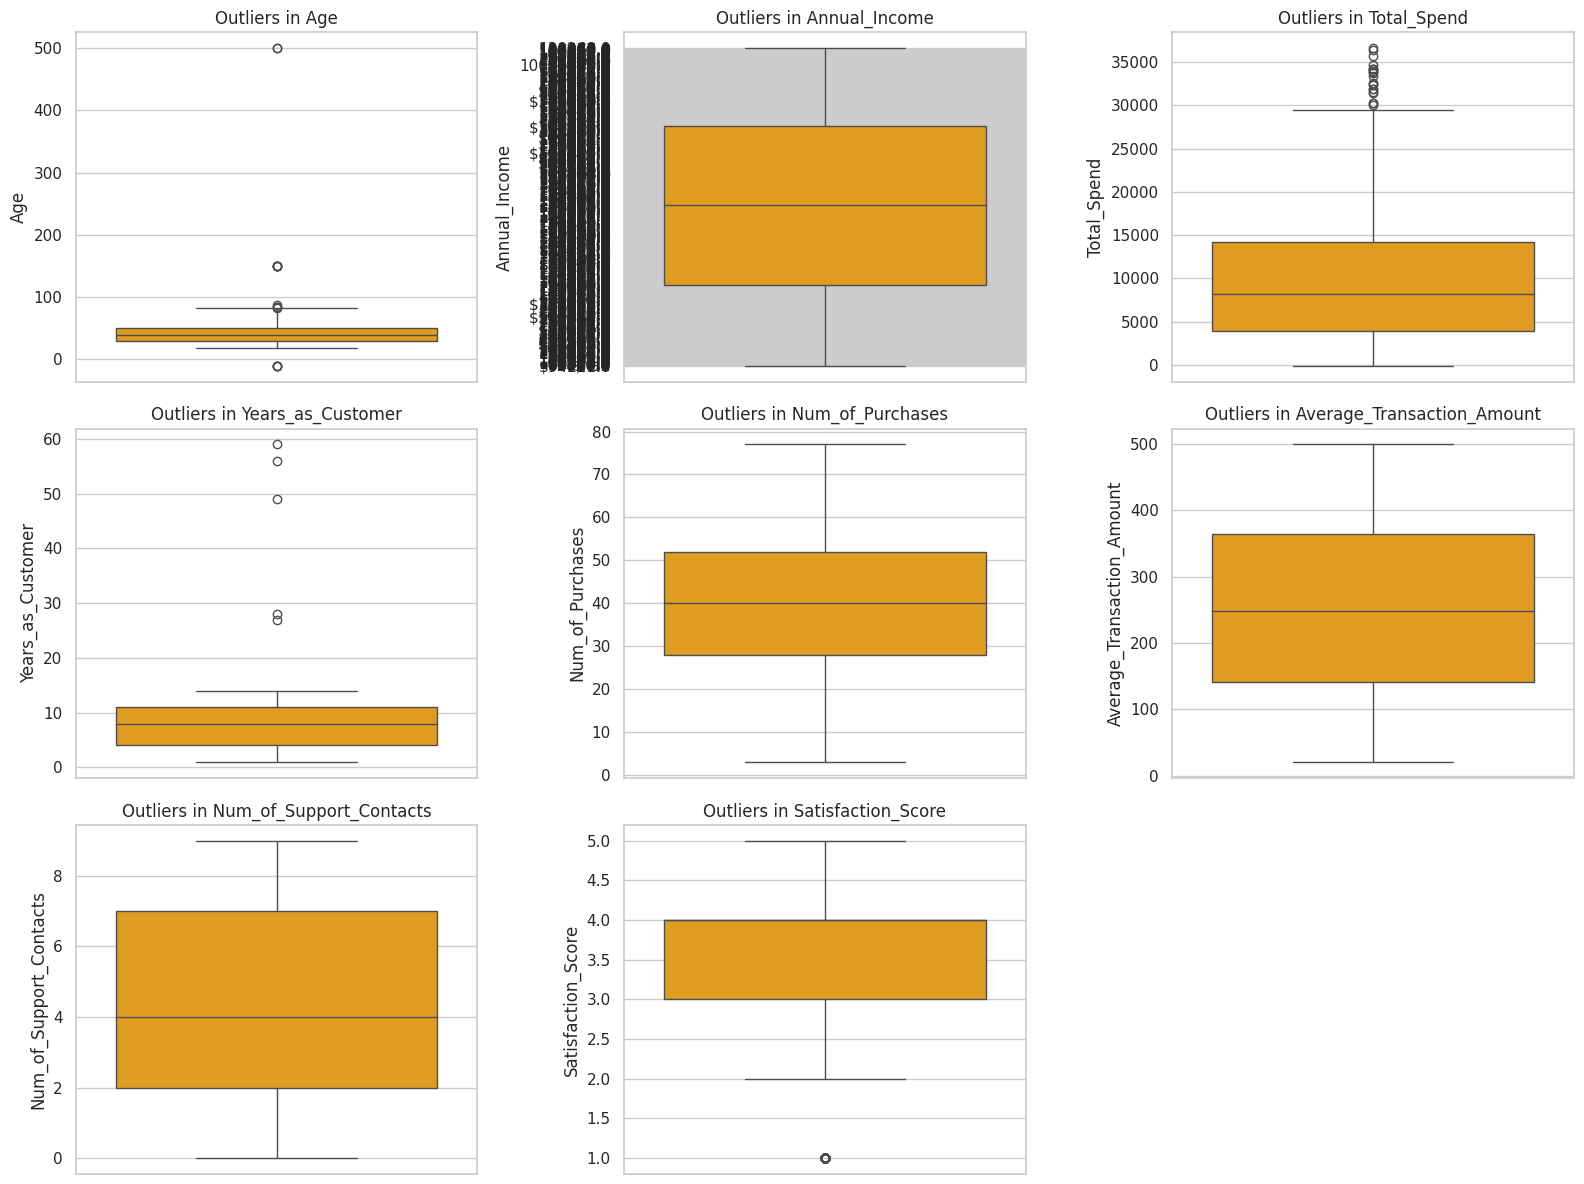

In [33]:

num_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 
            'Num_of_Purchases', 'Average_Transaction_Amount', 
            'Num_of_Support_Contacts', 'Satisfaction_Score']


plt.figure(figsize=(16, 12))


for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()